In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
cars_20 = pd.read_csv('/content/drive/MyDrive/EMSE 6574 Project/cleaned_data_2020.csv')
cars_20.head()

,Unnamed: 0,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,0,10299,2012,acura,tl,NaN,NaN,gas,90186.0,clean,automatic,NaN,NaN,other,blue,nc
1,2,9500,2011,jaguar,xf,excellent,NaN,gas,85000.0,clean,automatic,NaN,NaN,NaN,blue,nc
2,3,3995,2004,honda,element,NaN,NaN,gas,212526.0,clean,automatic,fwd,NaN,SUV,orange,nc
3,5,12995,2015,kia,sportage,NaN,NaN,gas,85127.0,clean,automatic,4wd,NaN,wagon,NaN,nc
4,6,10995,2014,chevrolet,traverse,NaN,NaN,gas,112383.0,clean,automatic,fwd,NaN,SUV,black,nc


In [ ]:
cars_21 = pd.read_csv('/content/drive/MyDrive/EMSE 6574 Project/cleaned_data_2021.csv')
cars_21.head()

,Unnamed: 0,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,27,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white,al
1,28,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,pickup,blue,al
2,29,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red,al
3,30,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,pickup,red,al
4,31,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al


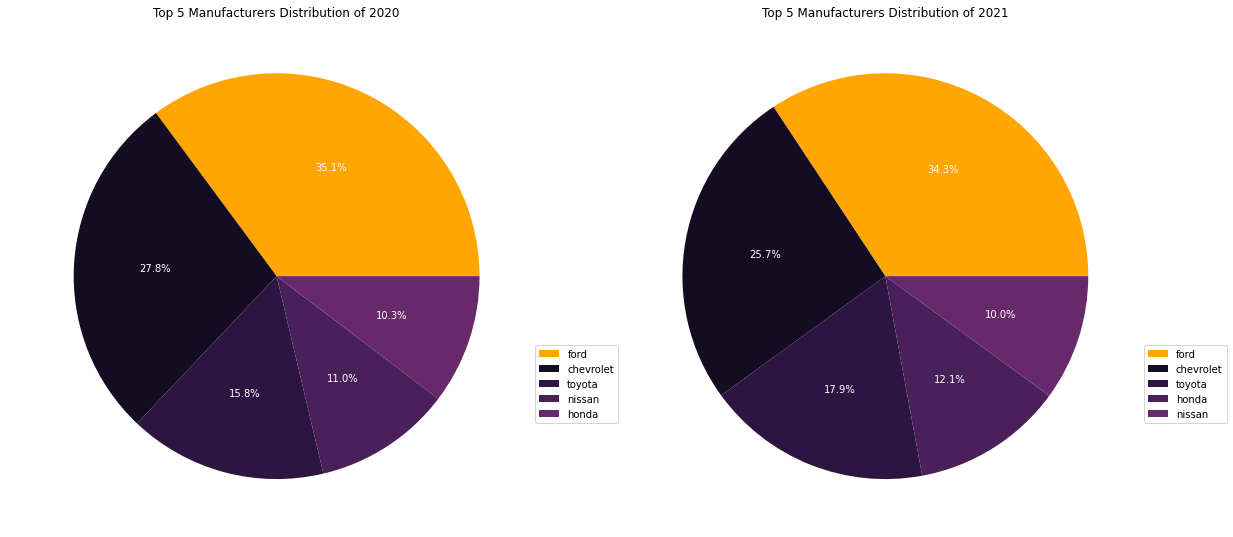

In [ ]:
# extracting frequency of top 10 manufacturers
data_20 = list(cars_20['manufacturer'].value_counts()[0:5])
data_21 = list(cars_21['manufacturer'].value_counts()[0:5])

labels_20= list(cars_20['manufacturer'].value_counts().index[0:5])
labels_21= list(cars_21['manufacturer'].value_counts().index[0:5])

color = ['#ffa600','#130c23','#2c1641','#49205a','#68296b','#863576','#a2437c','#b9537e','#cc6680','#e17c83','#e5ac93','#e8c4a4','#ecdbbd','#f2eedb']
plt.figure(figsize =(20,10))

plt.subplot(1,2,1)
# visualizing distribution of manufacturers on 2020
plt.pie(data_20, labels=labels_20,autopct='%1.1f%%',colors=color,textprops={'color':'w'},pctdistance=0.6)
plt.title("Top 5 Manufacturers Distribution of 2020")
plt.legend(bbox_to_anchor=(1,0.2),loc=3)

plt.subplot(1,2,2)
# visualizing distribution of manufacturers on 2021
plt.pie(data_21, labels=labels_21,autopct='%1.1f%%',colors=color,textprops={'color':'w'},pctdistance=0.6)
plt.title("Top 5 Manufacturers Distribution of 2021")
plt.legend(bbox_to_anchor=(1,0.2),loc=3)

plt.show()

The Top 3 car manufacturers remain the same , whereas Honda beat Nissan in the year 2021 . Although Ford , Chevrolet and Toyota remain to be the Top 3 , there is dip in market share of Ford and Chevrolet while there is an increase in Toyota's market share . 

In [ ]:
# extracting data for the top 5 car brands 
cars_20_fil=cars_20[[x in labels_20[0:5] for x in cars_20['manufacturer']]]
cars_21_fil=cars_21[[x in labels_21[0:5] for x in cars_21['manufacturer']]]

cars_20_fil.loc[:,'year']='2020'
cars_21_fil.loc[:,'year']='2021'

aa=cars_20_fil.append(cars_21_fil)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


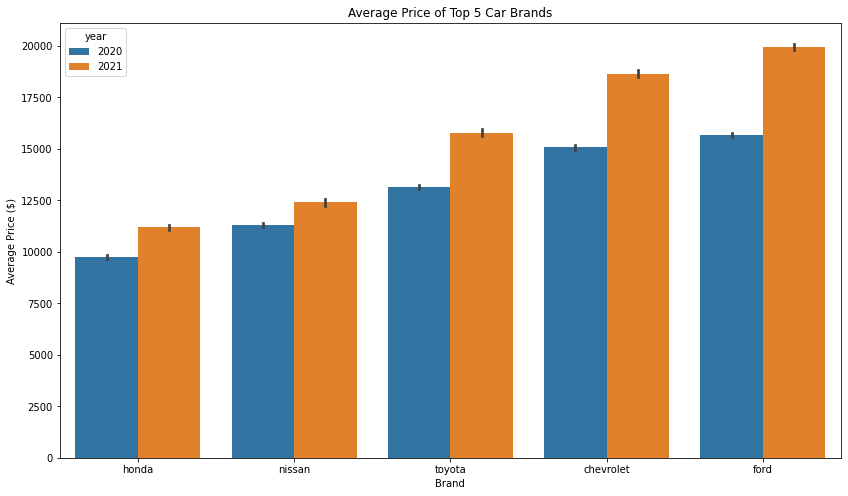

In [ ]:
# Visualizing Average price of Manufacturers over the two years 
plt.figure(figsize=(14,8))
sns.barplot(x='manufacturer',y='price',hue='year',data=aa,estimator=np.mean,order=reversed(labels_20))
plt.title('Average Price of Top 5 Car Brands')
plt.xlabel('Brand')
plt.ylabel('Average Price ($)')
plt.show()

It can seen that the average price of car for the Top 5 brands have increased . We can see a drastic rise in average car prices of Ford and Chevrolet , which could be reason behind the dip in market share in 2021 for Ford and Chevrolet .

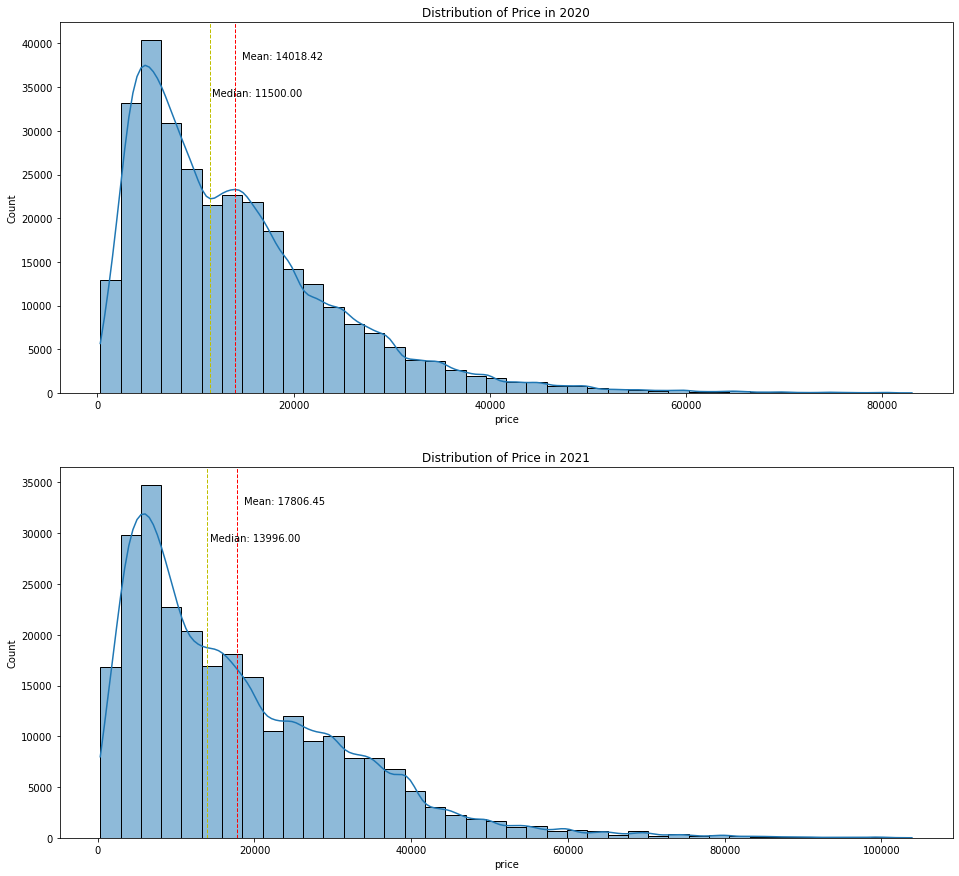

In [ ]:
# visualizing the price distribution , mean and median and compare over 2020 and 2021
plt.figure(figsize=(16,15))

plt.subplot(2,1,1)
pmean_20=cars_20['price'].mean()
pmedian_20=cars_20['price'].median()
sns.histplot(x='price',data=cars_20,bins=40,kde=True)
plt.axvline(pmean_20, color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(pmean_20*1.05, max_ylim*0.9, 'Mean: {:.2f}'.format(pmean_20))
plt.axvline(pmedian_20, color='y', linestyle='dashed', linewidth=1)
plt.text(pmedian_20*1.02, max_ylim*0.8, 'Median: {:.2f}'.format(pmedian_20))
plt.title('Distribution of Price in 2020')

plt.subplot(2,1,2)
pmean_21=cars_21['price'].mean()
pmedian_21=cars_21['price'].median()
sns.histplot(x='price',data=cars_21,bins=40,kde=True)
plt.axvline(pmean_21, color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(pmean_21*1.05, max_ylim*0.9, 'Mean: {:.2f}'.format(pmean_21))
plt.axvline(pmedian_21, color='y', linestyle='dashed', linewidth=1)
plt.text(pmedian_21*1.02, max_ylim*0.8, 'Median: {:.2f}'.format(pmedian_21))
plt.title('Distribution of Price in 2021')
plt.show()

The average price of a car increased from \$14018 to \$17806 from year 2020 to 2021. Similary median price of a car has increased from \$11500 to \$13996 from year 2020 to 2021 . Quite evidently , the price has increased over the 1 year indicating that the sale of expensive and luxurious cars have increased , or the market rate of cars have themselves gone up due to market inflation. The numbers also indicate that sale of worth more than $25000 have increased , thus increasing the average and median car price .

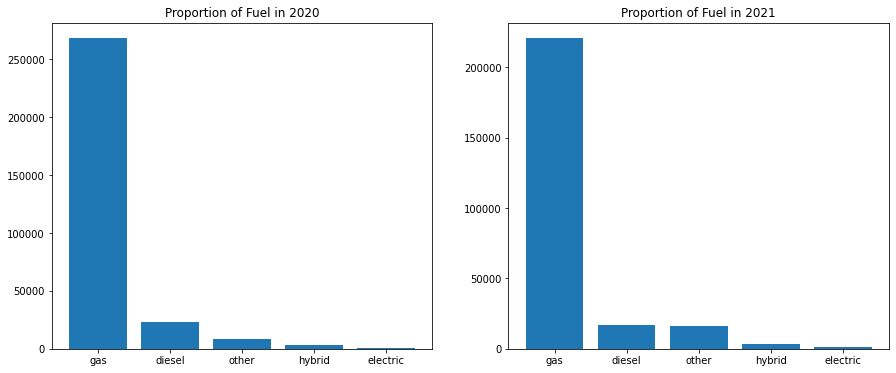

In [ ]:
# extracting frequency of car fuel types 
data_20 = list(cars_20['fuel'].value_counts())
data_21 = list(cars_21['fuel'].value_counts())

labels_20= list(cars_20['fuel'].value_counts().index)
labels_21= list(cars_21['fuel'].value_counts().index)
plt.figure(figsize=(15,6))

# visualizing the distribution of fuel types using a bar graph 
plt.subplot(1,2,1)
plt.bar(labels_20,height=data_20)
plt.title('Proportion of Fuel in 2020')
plt.subplot(1,2,2)
plt.bar(labels_21,height=data_21)
plt.title('Proportion of Fuel in 2021')

plt.show()


In [ ]:
# extracting data specific to Gasoline and Electric powered cars
fuel_data_20 = {ful:freq for ful,freq in zip(labels_20,data_20)}
fuel_data_21 = {ful:freq for ful,freq in zip(labels_21,data_21)}

fuel_20={}
fuel_21={}

fuel_20['Gasoline']=fuel_data_20['gas']+fuel_data_20['diesel']
fuel_21['Gasoline']=fuel_data_21['gas']+fuel_data_21['diesel']

fuel_20['Electric']=fuel_data_20['electric']+fuel_data_20['hybrid']
fuel_21['Electric']=fuel_data_21['electric']+fuel_data_21['hybrid']

data_20=list(fuel_20.values())
data_21=list(fuel_21.values())

labels_20=list(fuel_20.keys())
labels_21=list(fuel_21.keys())

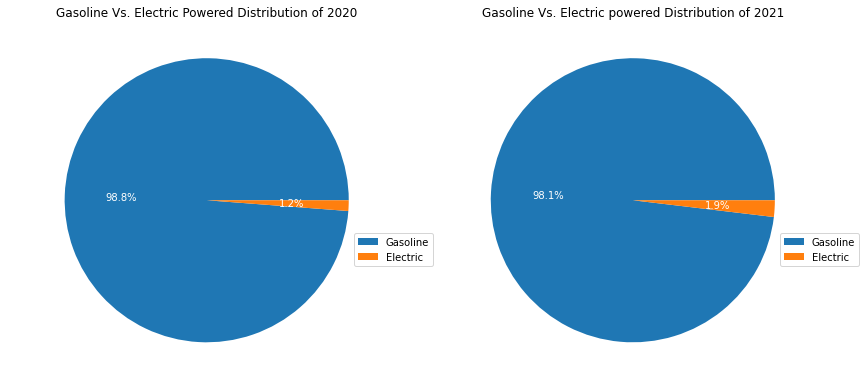

In [ ]:
plt.figure(figsize =(14,10))

plt.subplot(1,2,1)
# visualizing distribution of manufacturers over 2020
plt.pie(data_20, labels=labels_20,autopct='%1.1f%%',textprops={'color':'w'},pctdistance=0.6)
plt.title("Gasoline Vs. Electric Powered Distribution of 2020")
plt.legend(bbox_to_anchor=(0.9,0.3),loc=3)

plt.subplot(1,2,2)
# visualizing distribution of manufacturers over 2021
plt.pie(data_21, labels=labels_21,autopct='%1.1f%%',textprops={'color':'w'},pctdistance=0.6)
plt.title("Gasoline Vs. Electric powered Distribution of 2021")
plt.legend(bbox_to_anchor=(0.9,0.3),loc=3)

plt.show()

In [ ]:
print("Gasoline Vs. Electric fuel proportion (2020): ",fuel_20['Gasoline']/fuel_20['Electric'])
print("Gasoline Vs. Electric fuel proportion (2021): ",fuel_21['Gasoline']/fuel_21['Electric'])

Gasoline Vs. Electric fuel proportion (2020):  81.76761156328936
Gasoline Vs. Electric fuel proportion (2021):  52.06529360210342


For Gasoline Powered cars we considered both gas and diesel in that category , and for electric cars we considered both electric and hybrid cars. 

The Gasoline vs Electric proportion has decreased from 2020 to 2021 by almost 2 times.This is a strong indication that , the Sales of Gasolin-powered cars have declined whereas Electric vehicles have taken a steep rise in terms of sales. 